In [2]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import requests
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.neural_network import MLPClassifier as MLP
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from collections import OrderedDict

In [3]:
url = (r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

abcs = pd.read_csv(url)

abcs.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
abcsupdate = abcs.rename(columns={'Whole weight' : 'whole_weight', 'Shucked weight' : 'shucked_weight', 'Viscera weight' : 'viscera_weight', 'Shell weight' : 'shell_weight'})
abcsupdate

,Sex,Length,Diameter,Height,whole_weight,shucked_weight,viscera_weight,shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [9]:
abcsupdate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [13]:
pd.get_dummies(abcsupdate['Sex'])

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
4172,1,0,0
4173,0,0,1
4174,0,0,1
4175,1,0,0


In [21]:
def preprocess_and_train(df, target, task):
    df = df.copy()
    
    if target != 'Sex':
        dummies = pd.get_dummies(df['Sex'])
        df = pd.concat([df, dummies], axis=1)
        df = df.drop('Sex', axis=1)
    
    y = df[target].copy()
    X = df.drop(target, axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    
    if task == 'regression':
        model = LinearRegression()
    elif task == 'classification':
        model = LogisticRegression()
    
    model.fit(X_train, y_train)
    
    return model.score(X_test, y_test)

In [22]:
abcsupdate

,Sex,Length,Diameter,Height,whole_weight,shucked_weight,viscera_weight,shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [24]:
results = preprocess_and_train(abcsupdate, target='Sex', task='classification')

print("Sex Classification Accuracy: {:.2f}%".format(results * 100))

Sex Classification Accuracy: 57.10%


In [26]:
results = preprocess_and_train(abcsupdate, target='Length', task='regression')

print("Length Regression R^2: {:.4f}".format(results))

Length Regression R^2: 0.9753


In [28]:
results = preprocess_and_train(abcsupdate, target='Diameter', task='regression')

print("Diameter Regression R^2: {:.4f}".format(results))

Diameter Regression R^2: 0.9758


In [29]:
results = preprocess_and_train(abcsupdate, target='Height', task='regression')

print("Height Regression R^2: {:.4f}".format(results))

Height Regression R^2: 0.8148


In [31]:
results = preprocess_and_train(abcsupdate, target='whole_weight', task='regression')

print("Whole_Weight Regression R^2: {:.4f}".format(results))

Whole_Weight Regression R^2: 0.9908


In [32]:
results = preprocess_and_train(abcsupdate, target='shucked_weight', task='regression')

print("Shucked_Weight Regression R^2: {:.4f}".format(results))

Shucked_Weight Regression R^2: 0.9676


In [33]:
results = preprocess_and_train(abcsupdate, target='viscera_weight', task='regression')

print("Viscera_Weight Regression R^2: {:.4f}".format(results))

Viscera_Weight Regression R^2: 0.9459


In [34]:
results = preprocess_and_train(abcsupdate, target='shell_weight', task='regression')

print("Shell_Weight Regression R^2: {:.4f}".format(results))

Shell_Weight Regression R^2: 0.9511


In [35]:
results = preprocess_and_train(abcsupdate, target='Rings', task='regression')

print("Rings Regression R^2: {:.4f}".format(results))

Rings Regression R^2: 0.5186


In [37]:
results = preprocess_and_train(abcsupdate, target='Rings', task='classification')

print("Rings Classification Accuracy: {:.2f}%".format(results * 100))

Rings Classification Accuracy: 25.92%


In [38]:
abcsupdate

,Sex,Length,Diameter,Height,whole_weight,shucked_weight,viscera_weight,shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [39]:
abcsupdate.describe()

,Length,Diameter,Height,whole_weight,shucked_weight,viscera_weight,shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [40]:
abcsupdate['age'] = abcsupdate['Rings']+1.5
abcsupdate = abcsupdate.drop('Rings', axis = 1)

<AxesSubplot:>

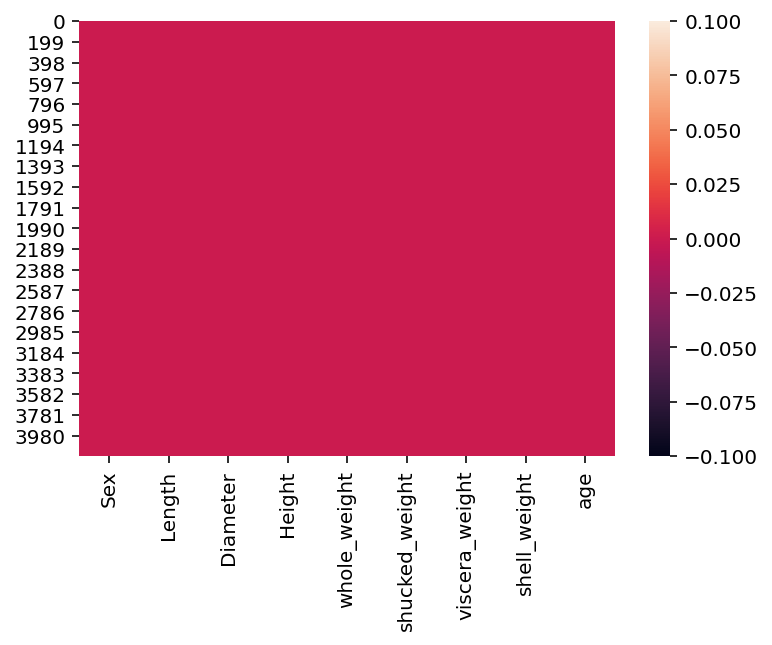

In [41]:
sns.heatmap(abcsupdate.isnull())

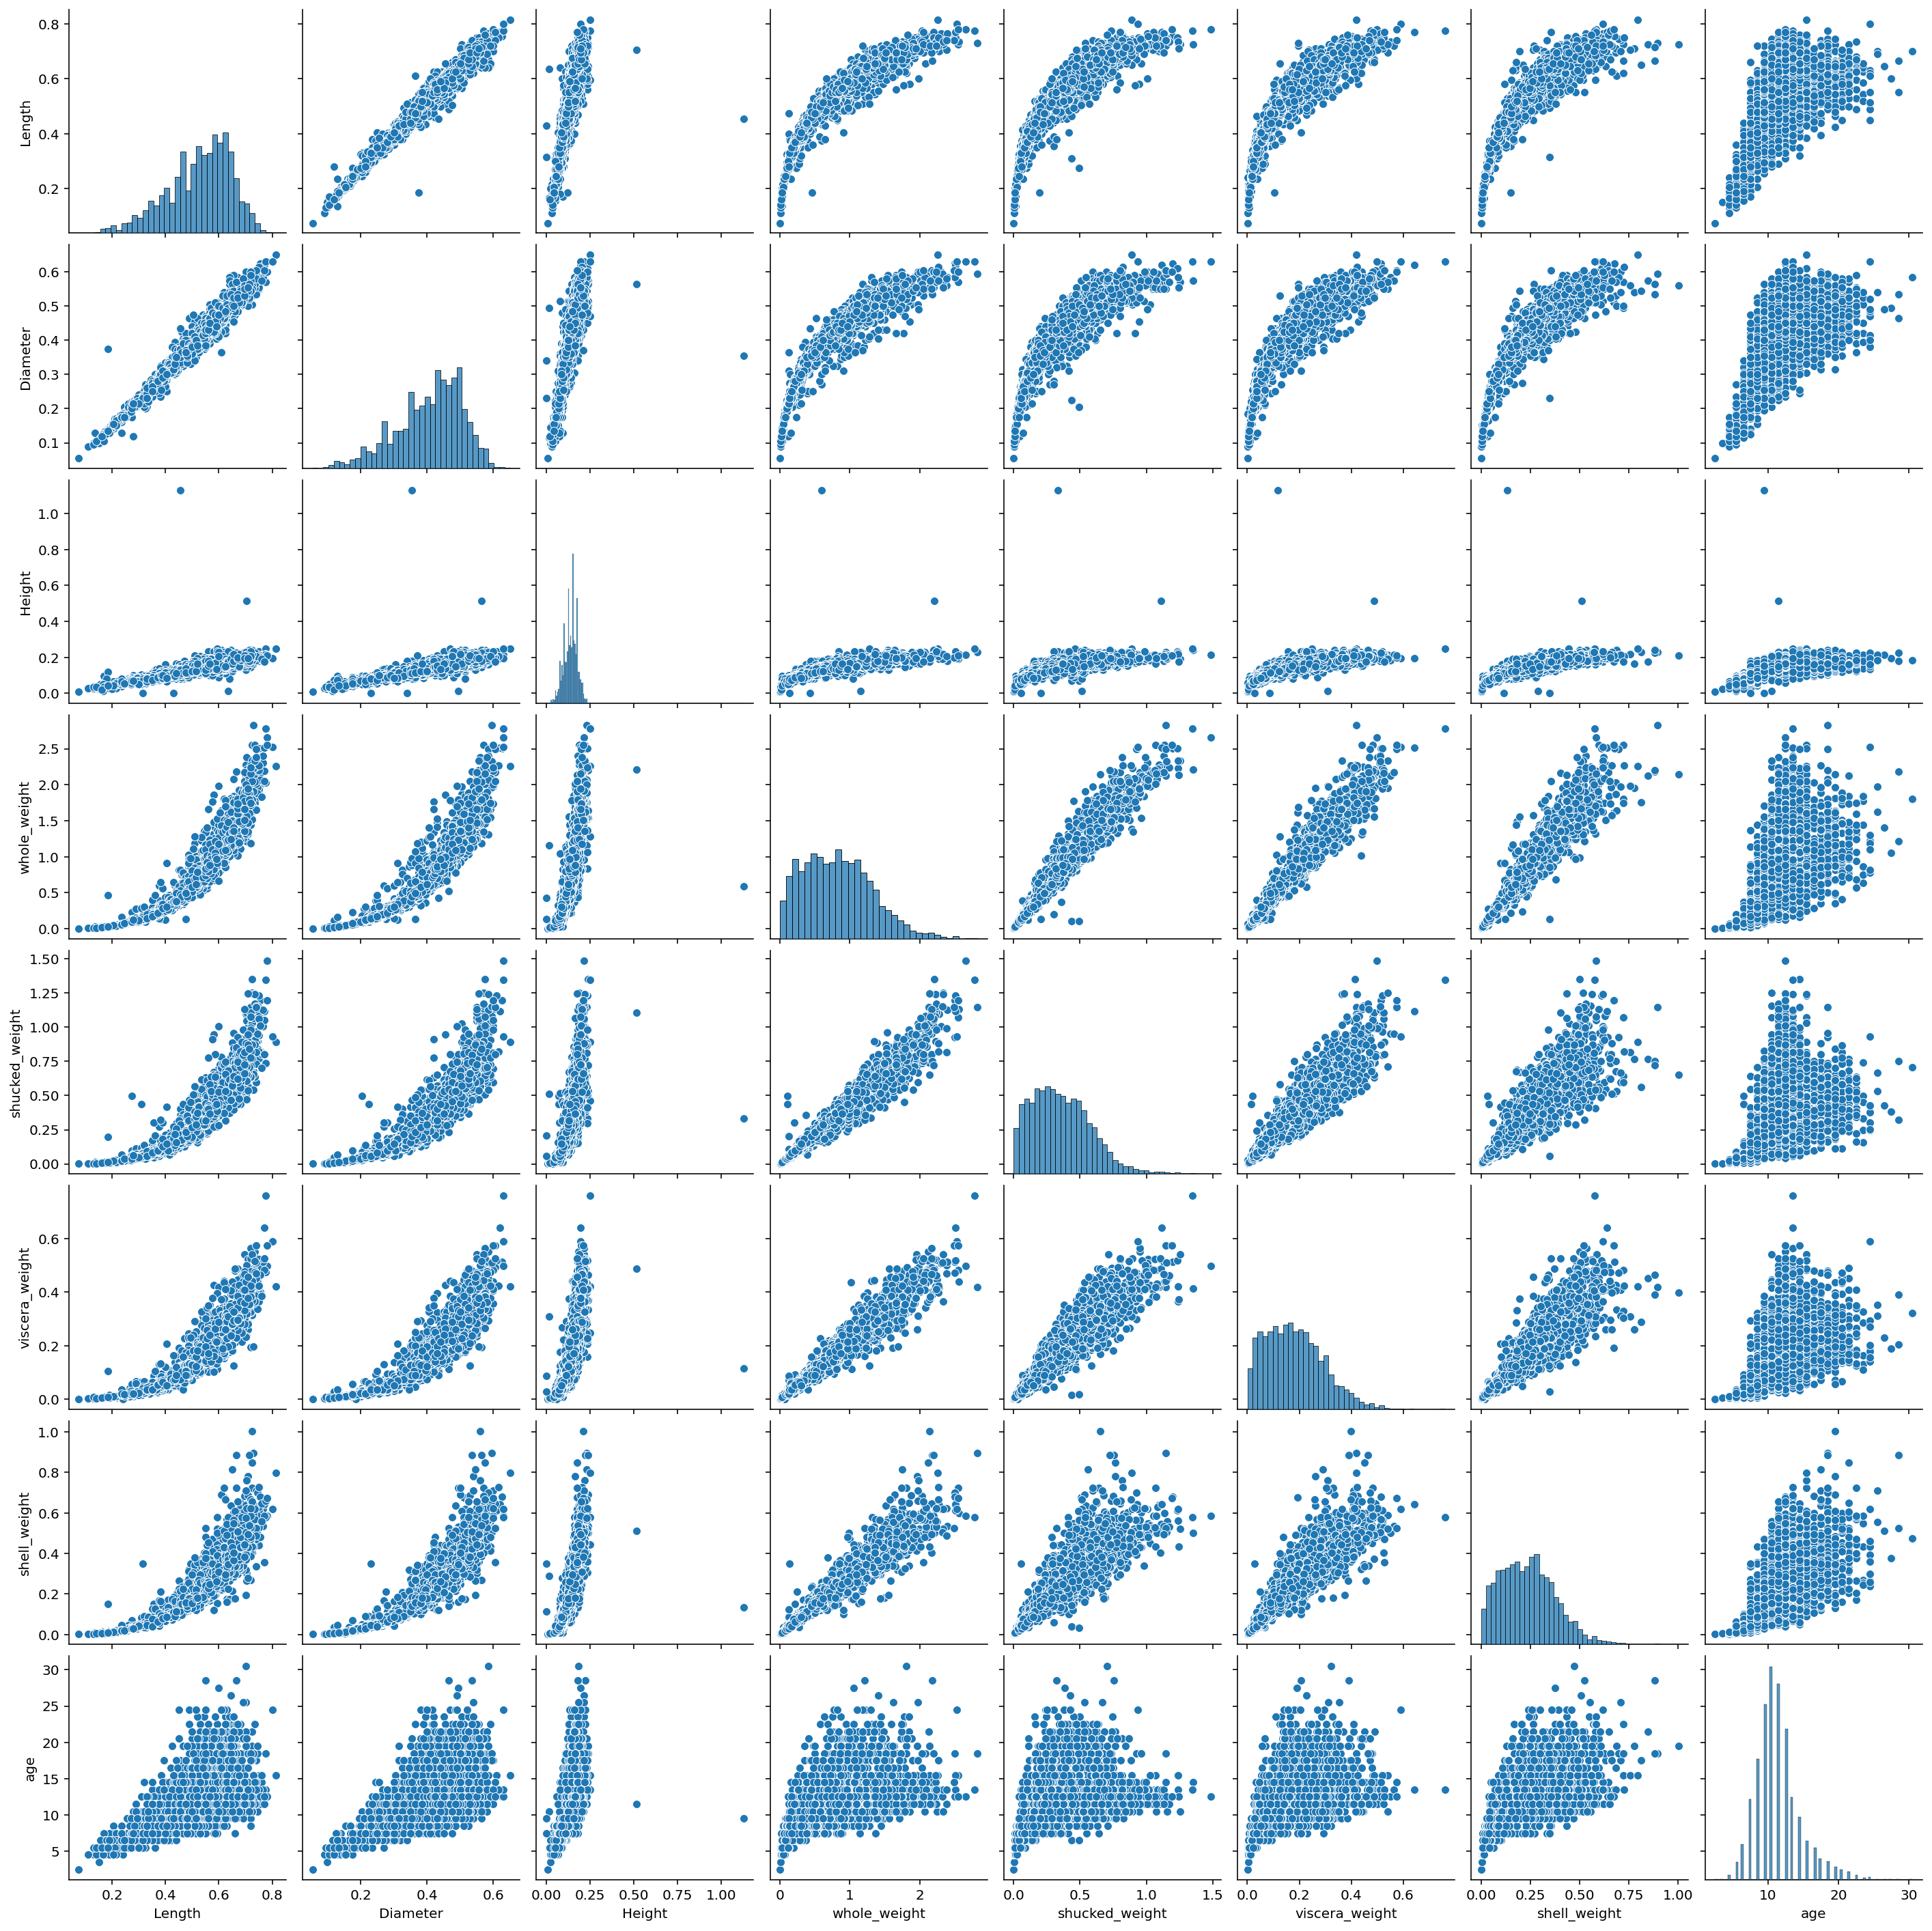

In [42]:
sns.pairplot(abcsupdate)

In [43]:
numerical_features = abcsupdate.select_dtypes(include = [np.number]).columns
categorical_features = abcsupdate.select_dtypes(include = [np.object]).columns

In [44]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'age'],
      dtype='object')

In [45]:
categorical_features

Index(['Sex'], dtype='object')

<AxesSubplot:>

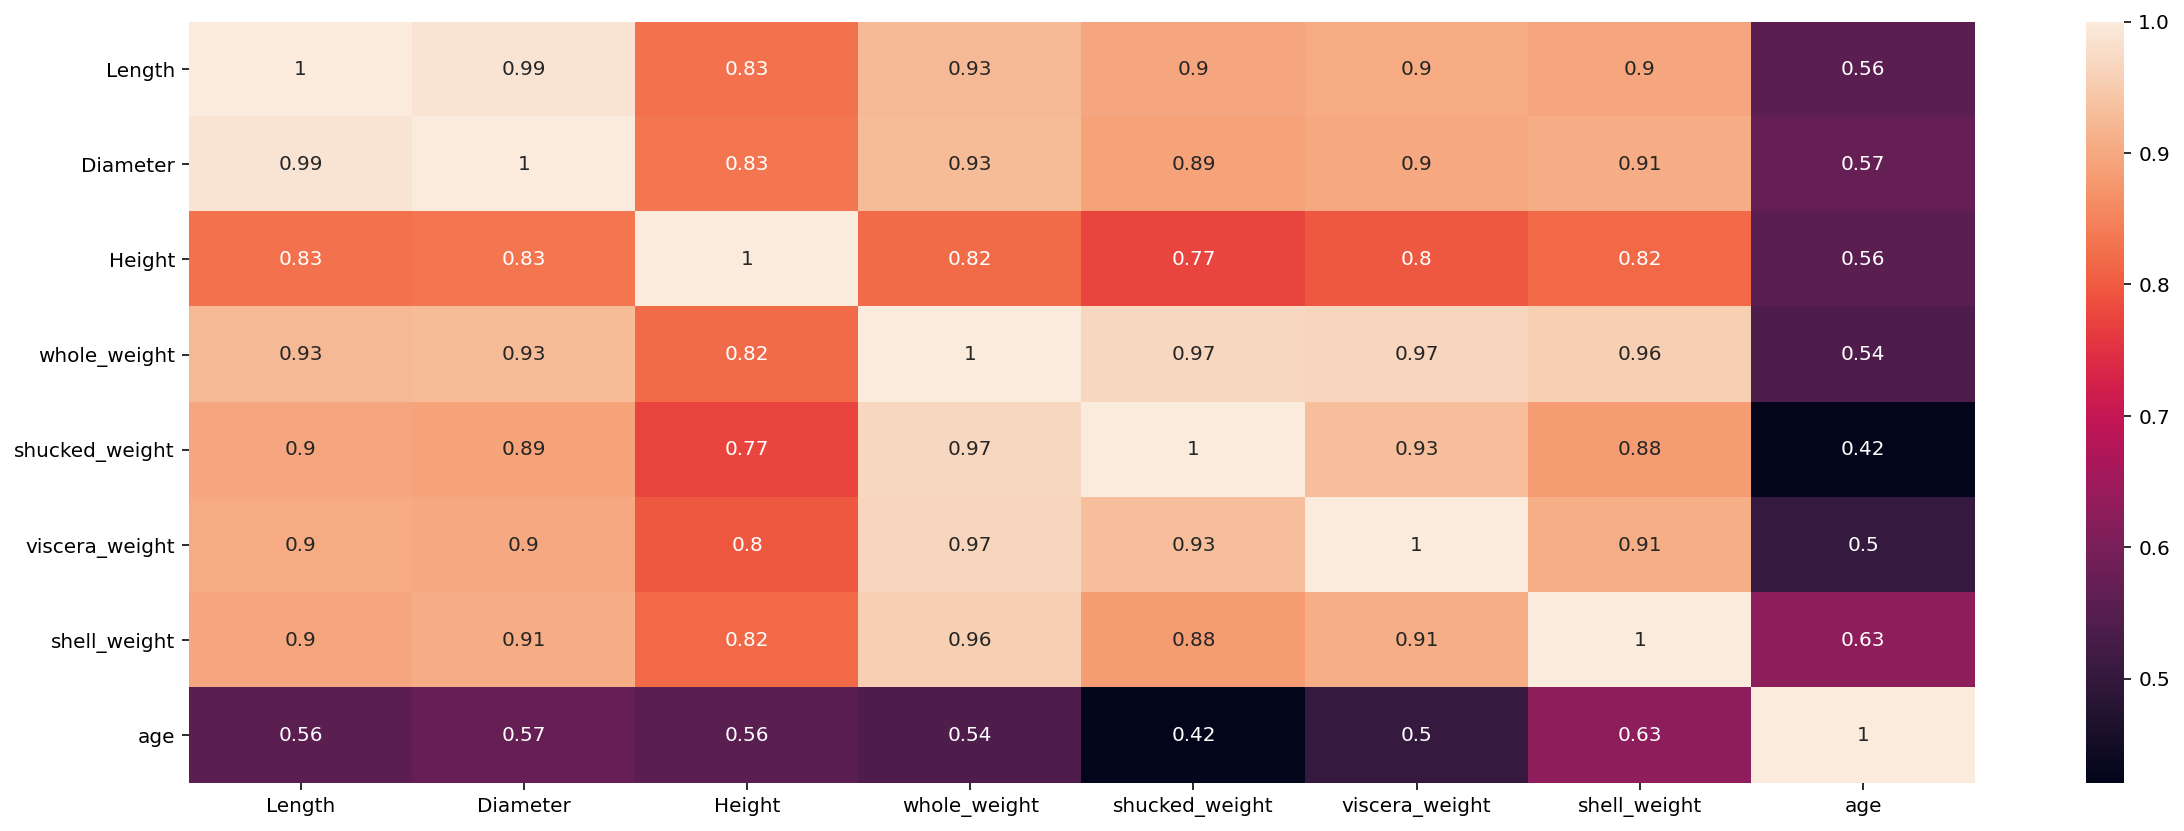

In [46]:
plt.figure(figsize = (20,7))
sns.heatmap(abcsupdate[numerical_features].corr(),annot = True)

<AxesSubplot:xlabel='Sex', ylabel='count'>

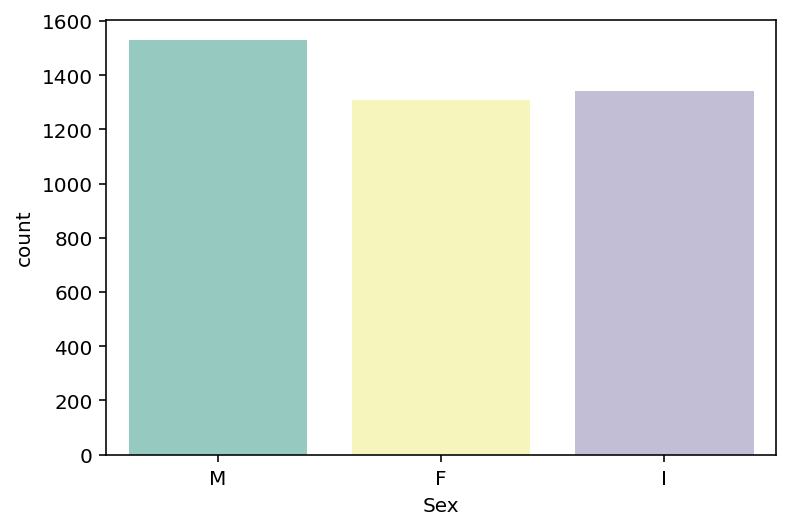

In [48]:
sns.countplot(x = 'Sex', data = abcsupdate, palette = 'Set3')

<AxesSubplot:xlabel='Sex', ylabel='age'>

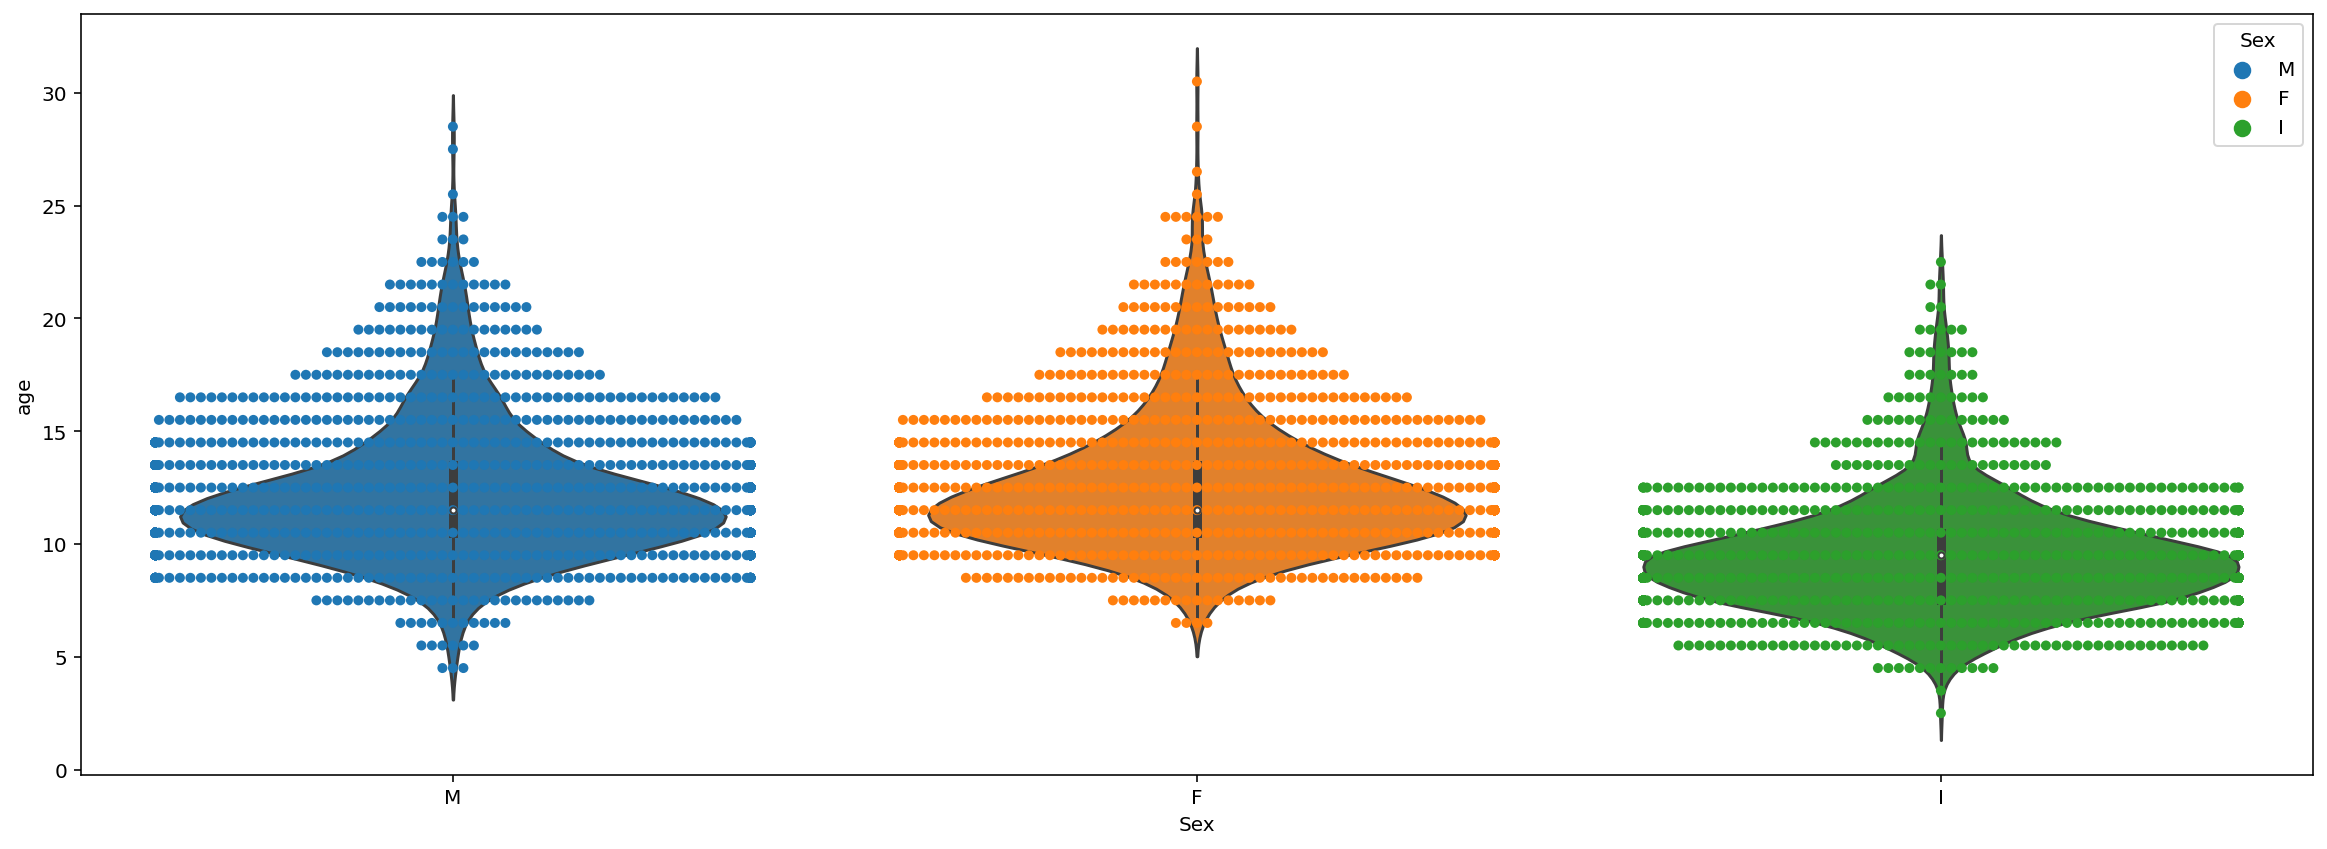

In [51]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'age', data = abcsupdate, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'age',data = abcsupdate)

In [52]:
abcsupdate = pd.get_dummies(abcsupdate)
dummy_abcsupdate = abcsupdate

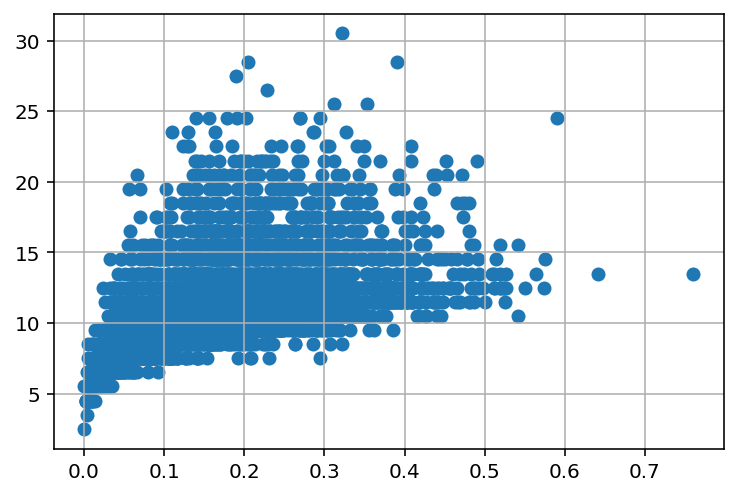

In [54]:
var = 'viscera_weight'
plt.scatter(x = abcsupdate[var], y = abcsupdate['age'])
plt.grid(True)

In [58]:
abcsupdate.drop(abcsupdate[(abcsupdate['viscera_weight'] > 0.5) &
          (abcsupdate['age'] < 20)].index, inplace = True)
abcsupdate.drop(abcsupdate[(abcsupdate['viscera_weight']<0.5) & (abcsupdate['age'] > 25)].index, inplace = True)

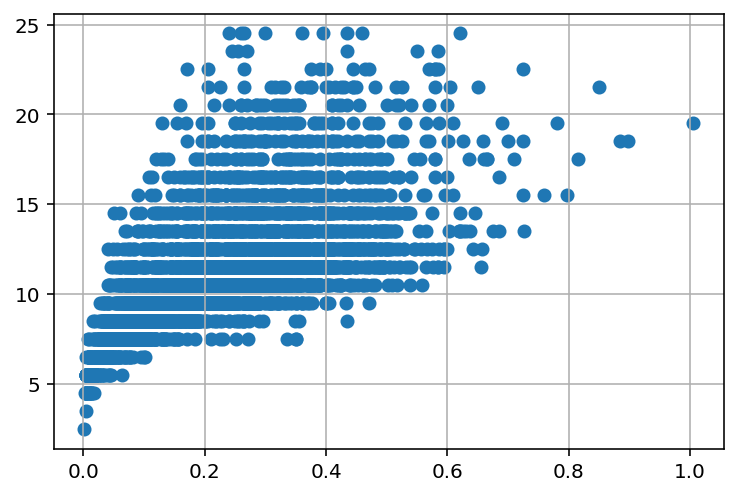

In [59]:
var = 'shell_weight'
plt.scatter(x = abcsupdate[var], y = abcsupdate['age'])
plt.grid(True)

In [60]:
abcsupdate.drop(abcsupdate[(abcsupdate['shell_weight'] > 0.6) &
          (abcsupdate['age'] < 25)].index, inplace = True)
abcsupdate.drop(abcsupdate[(abcsupdate['shell_weight']<0.8) & (
abcsupdate['age'] > 25)].index, inplace = True)

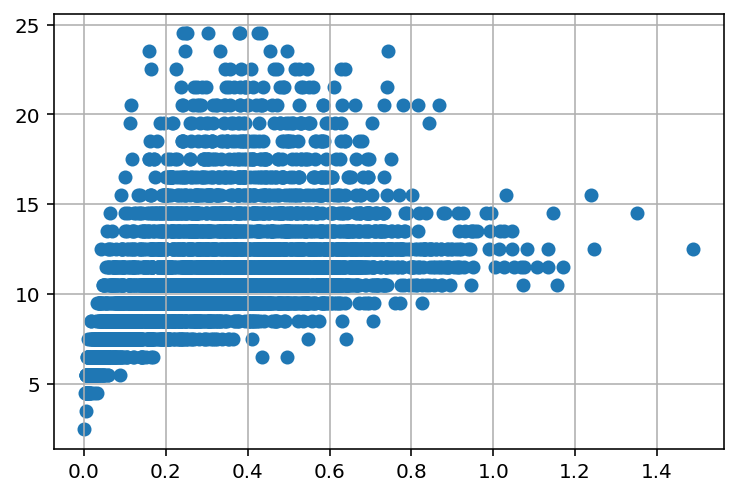

In [61]:
var = 'shucked_weight'
plt.scatter(x = abcsupdate[var], y = abcsupdate['age'])
plt.grid(True)

In [62]:
abcsupdate.drop(abcsupdate[(abcsupdate['shucked_weight'] >= 1) &
          (abcsupdate['age'] < 20)].index, inplace = True)
abcsupdate.drop(abcsupdate[(abcsupdate['viscera_weight']<1) & (
abcsupdate['age'] > 20)].index, inplace = True)

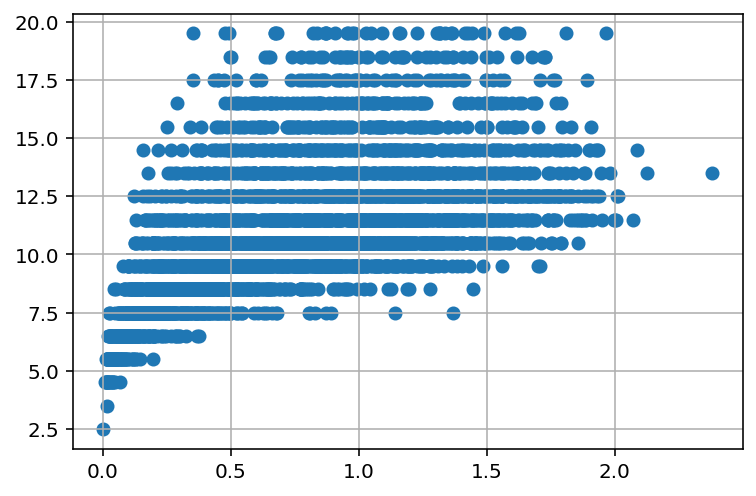

In [63]:
var = 'whole_weight'
plt.scatter(x = abcsupdate[var], y = abcsupdate['age'])
plt.grid(True)

In [64]:
abcsupdate.drop(abcsupdate[(abcsupdate['whole_weight'] >= 2.5) &
          (abcsupdate['age'] < 25)].index, inplace = True)
abcsupdate.drop(abcsupdate[(abcsupdate['whole_weight']<2.5) & (
abcsupdate['age'] > 25)].index, inplace = True)

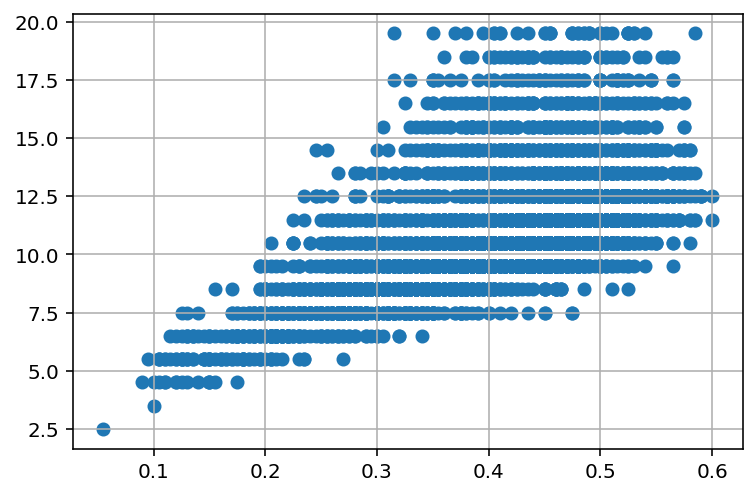

In [65]:
var = 'Diameter'
plt.scatter(x = abcsupdate[var], y = abcsupdate['age'])
plt.grid(True)

In [66]:
abcsupdate.drop(abcsupdate[(abcsupdate['Diameter'] <0.1) &
          (abcsupdate['age'] < 5)].index, inplace = True)
abcsupdate.drop(abcsupdate[(abcsupdate['Diameter']<0.6) & (
abcsupdate['age'] > 25)].index, inplace = True)
abcsupdate.drop(abcsupdate[(abcsupdate['Diameter']>=0.6) & (
abcsupdate['age'] < 25)].index, inplace = True)

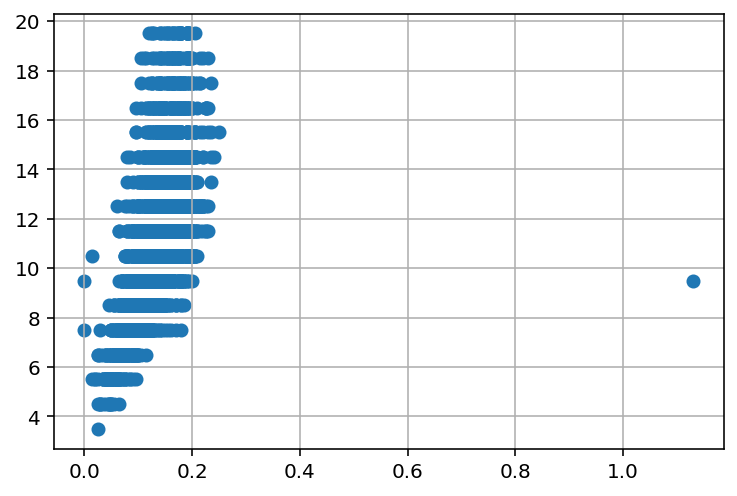

In [67]:
var = 'Height'
plt.scatter(x = abcsupdate[var], y = abcsupdate['age'])
plt.grid(True)

In [69]:
abcsupdate.drop(abcsupdate[(abcsupdate['Height'] > 0.4) &
          (abcsupdate['age'] < 15)].index, inplace = True)
abcsupdate.drop(abcsupdate[(abcsupdate['Height']<0.4) & (
abcsupdate['age'] > 25)].index, inplace = True)

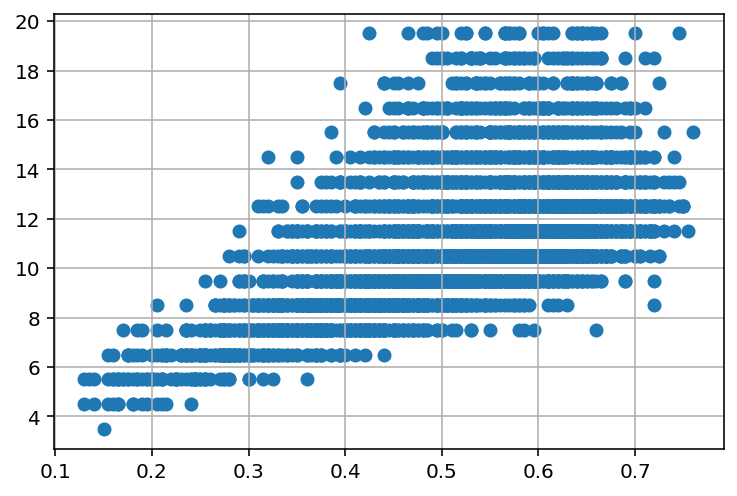

In [70]:
var = 'Length'
plt.scatter(x = abcsupdate[var], y = abcsupdate['age'])
plt.grid(True)

In [71]:
abcsupdate.drop(abcsupdate[(abcsupdate['Length'] <0.1) &
          (abcsupdate['age'] < 5)].index, inplace = True)
abcsupdate.drop(abcsupdate[(abcsupdate['Length']<0.8) & (
abcsupdate['age'] > 25)].index, inplace = True)
abcsupdate.drop(abcsupdate[(abcsupdate['Length']>=0.8) & (
abcsupdate['age'] < 25)].index, inplace = True)